In [35]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import HdpModel
from gensim.models.coherencemodel import CoherenceModel

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from gensim.corpora import Dictionary
from gensim.models import HdpModel

In [3]:
# Read the data
df_pre_covid = pd.read_csv("lemmatized_tokens_pre_covid.csv")
df_post_covid = pd.read_csv("lemmatized_tokens_post_covid.csv")

Non-negative Matrix Factorization (NMF)

In [31]:
# Preparing the text data
df_pre_covid['tokens_text'] = df_pre_covid['tokens'].apply(lambda x: ' '.join(eval(x)))

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_pre = vectorizer.fit_transform(df_pre_covid['tokens_text'])

# Apply NMF
nmf_model_pre = NMF(n_components=5, random_state=42)
nmf_model_pre.fit(X_pre)

# Extract topic words
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model_pre.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))


Topic #1:
deliver get delivery today yet still day please call update
Topic #2:
amazon prime available netflix india win giveaway pay contest watch
Topic #3:
buy one stop amp year new book good phone sell
Topic #4:
service flipkart customer product purchase bad call care day please
Topic #5:
order cancel place receive delivery refund show app date hour


In [32]:
# Preparing the text data
df_post_covid['tokens_text'] = df_post_covid['tokens'].apply(lambda x: ' '.join(eval(x)))

X_post = vectorizer.fit_transform(df_post_covid['tokens_text'])

# Apply NMF
nmf_model_post = NMF(n_components=5, random_state=42)
nmf_model_post.fit(X_post)

# Extract topic words
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model_post.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic #1:
flipkart product please help account return refund sir block request
Topic #2:
amazon prime available pay india like company get card help
Topic #3:
order deliver delivery cancel get today yet still receive day
Topic #4:
buy stop one dont purchase price cash sell year today
Topic #5:
service customer call bad issue care time day get purchase


Latent Semantic Analysis (LSA)

In [15]:
# Apply LSA (Truncated SVD)
lsa_model = TruncatedSVD(n_components=5)

print("Pre COVID")
lsa_model.fit(X_pre)

# Extract topic words
for topic_idx, topic in enumerate(lsa_model.components_):
    print(f"Topic #{topic_idx + 1}:")
    top_indices = [i for i in topic.argsort() if i < len(feature_names)][-10:]
    print(" ".join([feature_names[i] for i in top_indices]))

print("Post COVID")
lsa_model.fit(X_post)

# Extract topic words
for topic_idx, topic in enumerate(lsa_model.components_):
    print(f"Topic #{topic_idx + 1}:")
    top_indices = [i for i in topic.argsort() if i < len(feature_names)][-10:]
    print(" ".join([feature_names[i] for i in top_indices]))


Pre COVID
Topic #1:
call day customer service product delivery get amazon deliver order
Topic #2:
contest flipkart giveaway win netflix india available buy prime amazon
Topic #3:
netflix receive yet place cancel delivery prime deliver amazon order
Topic #4:
refund support pathetic call care bad product customer service flipkart
Topic #5:
sale money refund please stop place cancel flipkart buy order
Post COVID
Topic #1:
prsdnt dhone gujarati srikanth daysif amazonguesswho reasonsisbirthday frustration deve peopleby
Topic #2:
suffer rtrn deir thot vidmate propertyhope cauliflower dhone deve peopleby
Topic #3:
kabatti suffer cauliflower propertyhope awesomethankyou dhone rashtra deve peopleby amazonguesswho
Topic #4:
sahitya boi seevices cauliflower prsdnt daysif accountmake amazonguesswho peopleby frustration
Topic #5:
deleviry deve qmg pose chacha carpool dhone bajpaiji daysif srikanth


Hierarchical Dirichlet Process (HDP)

Topic #1:
deliver order buy amazon get purchase service customer delivery product time day amp flipkart call one please dont say give
Topic #2:
deliver buy amazon order purchase get amp service product customer delivery day time one say please flipkart call dont make
Topic #3:
deliver buy order amazon get purchase amp service day customer product time delivery one flipkart please call say make dont
Topic #4:
deliver buy order amazon get purchase amp delivery product time service day customer one call flipkart please say make take
Topic #5:
deliver buy order amazon get purchase amp service delivery customer time product one day flipkart please call say make give


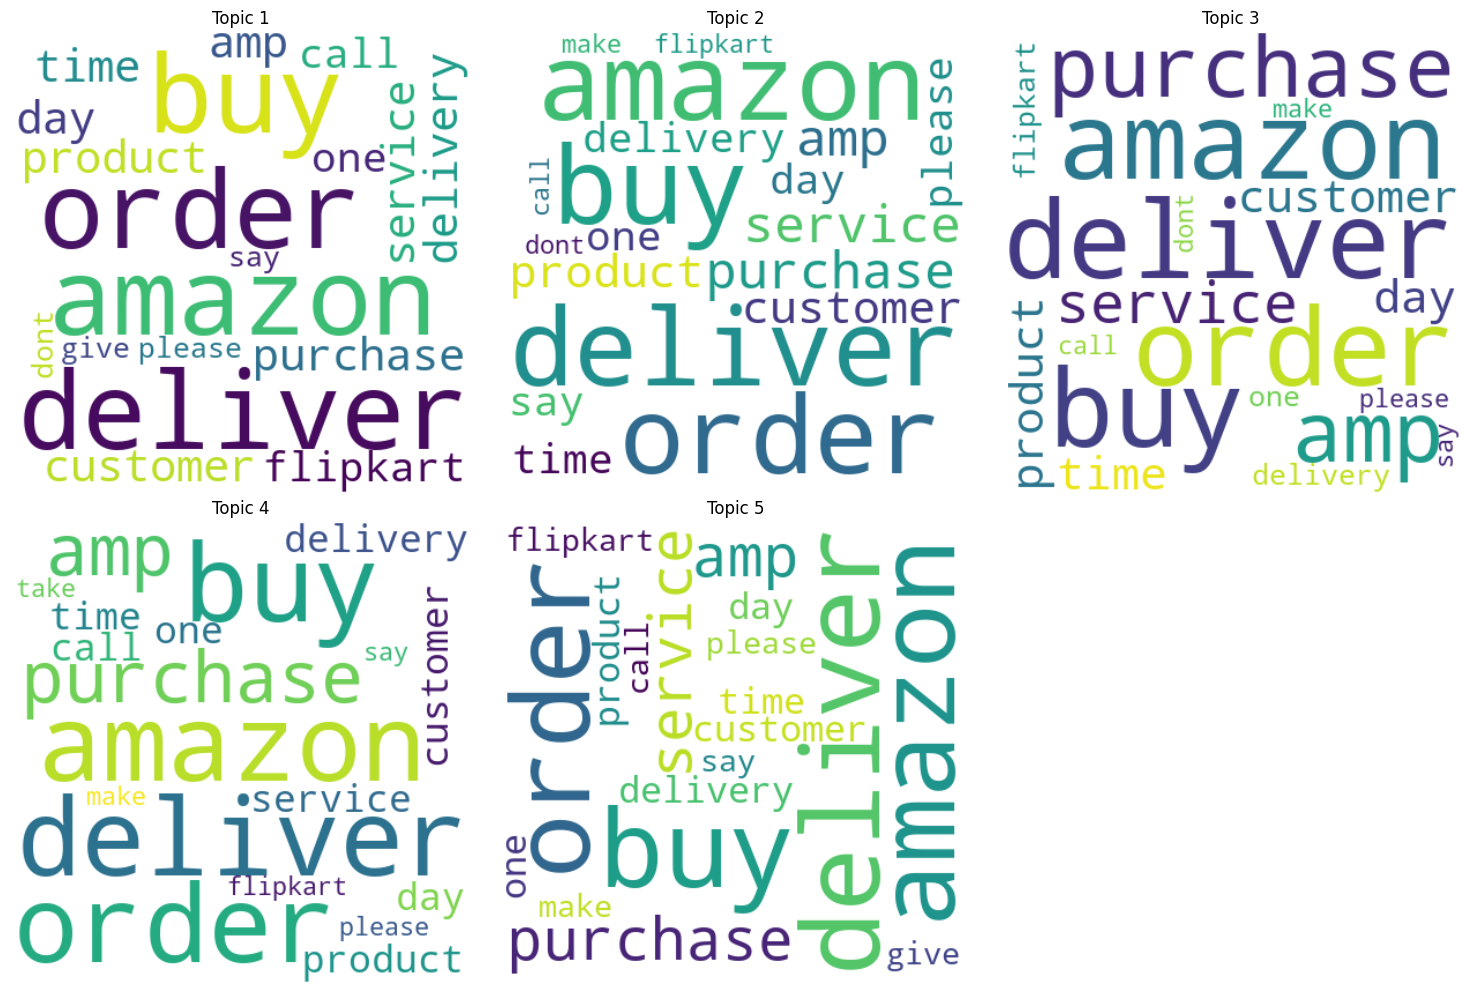

In [44]:
# Create a Gensim dictionary from the dataset
dictionary = Dictionary(df_pre_covid['tokens'].apply(eval))

# Create a Gensim corpus from the dictionary and the original corpus
corpus = [dictionary.doc2bow(text) for text in df_pre_covid['tokens'].apply(eval)]

# Apply HDP
hdp_model = HdpModel(corpus, dictionary)

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Manually specify positions
positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1)]

# Extract and print the topics
for pos, (topic_id, topic_terms) in zip(positions, hdp_model.show_topics(num_topics=5, formatted=False)):
    print(f"Topic #{topic_id + 1}:")
    topic_words = [word for word, _ in topic_terms]
    print(" ".join(topic_words))

    # Create a word cloud
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(' '.join(topic_words))

    # Plot the word cloud in the respective subplot
    ax = axes[pos]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Topic {topic_id + 1}")
    ax.axis("off")

# Remove the extra subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


Topic #1:
even connect book intentionally never instead million festival comment product well public take fairplay havent engvind jerk gift uninstall nonsense
Topic #2:
even book intentionally connect never million product instead festival comment take public well havent engvind fairplay gift jerk receive uninstall
Topic #3:
book even product intentionally connect never gift million instead festival comment take public engvind fairplay jerk well havent know alert
Topic #4:
even connect book intentionally never product instead million festival public take well engvind fairplay comment havent gift jerk step every
Topic #5:
even connect book intentionally never product festival instead million comment public take well fairplay havent engvind gift jerk wait step


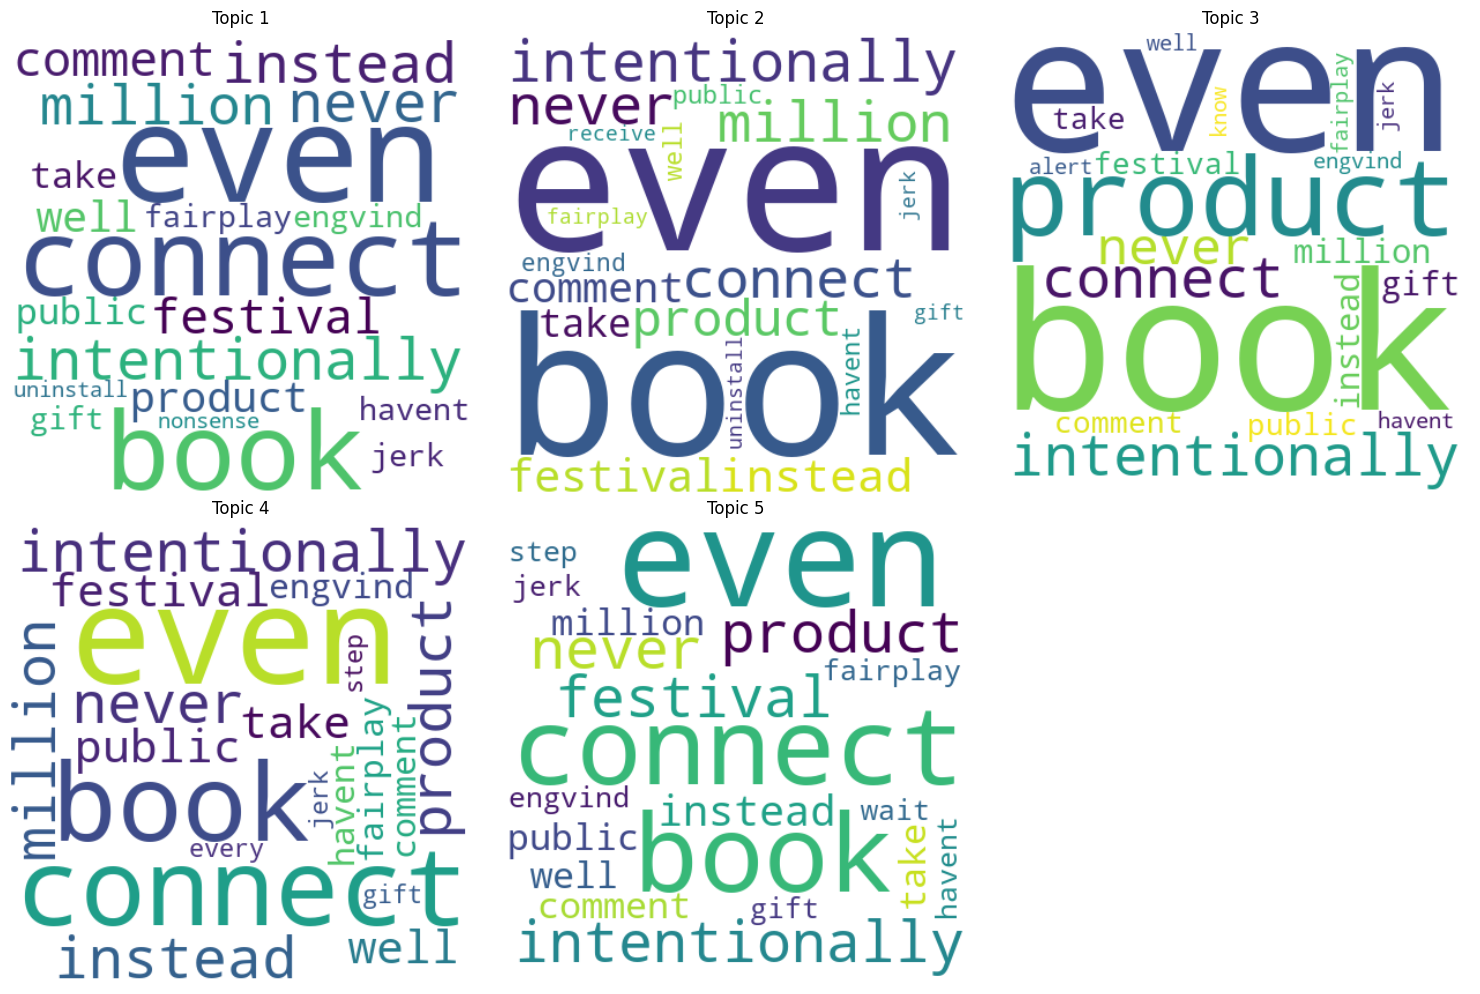

In [29]:
# Create a Gensim dictionary from the dataset
dictionary_post = Dictionary(df_post_covid['tokens'].apply(eval))

# Create a Gensim corpus from the dictionary and the original corpus
corpus_post = [dictionary.doc2bow(text) for text in df_post_covid['tokens'].apply(eval)]

# Apply HDP
hdp_model_post = HdpModel(corpus_post, dictionary_post)

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Manually specify positions
positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1)]

# Extract and print the topics
for pos, (topic_id, topic_terms) in zip(positions, hdp_model_post.show_topics(num_topics=5, formatted=False)):
    print(f"Topic #{topic_id + 1}:")
    topic_words = [word for word, _ in topic_terms]
    print(" ".join(topic_words))

    # Create a word cloud
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(' '.join(topic_words))

    # Plot the word cloud in the respective subplot
    ax = axes[pos]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Topic {topic_id + 1}")
    ax.axis("off")

# Remove the extra subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


In [30]:
def calculate_coherence_score(model, vectorizer, texts, coherence_type='c_v'):
    
    # Get the feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Get the top words for each topic
    topic_words = []
    for topic in model.components_:
        words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
        topic_words.append(words)

    # Create Gensim dictionary and corpus
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Calculate coherence score
    coherence_model = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, corpus=corpus, coherence=coherence_type)
    return coherence_model.get_coherence()


In [37]:
coherence_score_pre = calculate_coherence_score(nmf_model_pre,vectorizer,df_pre_covid['tokens'].apply(eval).tolist())
coherence_score_post = calculate_coherence_score(nmf_model_post,vectorizer,df_post_covid['tokens'].apply(eval).tolist())

In [38]:
print("Pre Covid Coherence Score (c_v):", coherence_score_pre)
print("Post Covid Coherence Score (c_v):", coherence_score_post)

Pre Covid Coherence Score (c_v): 0.3096679680592738
Post Covid Coherence Score (c_v): 0.5295413018722467


In [39]:
coherence_score_pre = calculate_coherence_score(lsa_model.fit(X_pre),vectorizer,df_pre_covid['tokens'].apply(eval).tolist())
coherence_score_post = calculate_coherence_score(lsa_model.fit(X_post),vectorizer,df_post_covid['tokens'].apply(eval).tolist())

In [40]:
print("Pre Covid Coherence Score (c_v):", coherence_score_pre)
print("Post Covid Coherence Score (c_v):", coherence_score_post)

Pre Covid Coherence Score (c_v): 0.2734613075942252
Post Covid Coherence Score (c_v): 0.5728213161055257


Post-Covid vs. Pre-Covid: Both the NMF and LSA models have higher coherence scores for the post-Covid dataset compared to the pre-Covid dataset. Means the post-Covid dataset are more coherent and potentially more interpretable.

NMF vs. LSA: For both the pre-Covid and post-Covid datasets, LSA has a higher coherence score compared to NMF. Mostly LSA generating more coherent topics than NMF, although the difference is not very large for the post-Covid dataset.